In [4]:
import numpy as np

x=np.random.random(10)
y=np.random.random(10)
print(x)
print(y)

[0.02172208 0.78267296 0.3538689  0.42227196 0.01069408 0.71911062
 0.61478828 0.16682649 0.21426236 0.08945361]
[0.55058933 0.30468253 0.08737037 0.5232532  0.84917845 0.59788831
 0.02182727 0.07353297 0.0017444  0.74410941]


In [5]:
distance=np.linalg.norm(x-y)
distance

1.4632804007924678

In [7]:
from scipy.spatial.distance import pdist

arr=np.vstack([x,y])

d=pdist(arr,'euclidean')
d

array([1.4632804])

In [10]:
import pandas as pd
data = {'x':[25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,
            65,47,49,48,35,33,44,45,38,43,51,46],
        'y':[79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,
            59,50,25,20,14,12,20,5,29,27,8,7]}
df=pd.DataFrame(data,columns=['x','y'])
df

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


In [14]:
import matplotlib.pyplot as plt
from sklearn import cluster,datasets,metrics
from sklearn.cluster import KMeans

In [15]:
n_clusters=3
kmeans=cluster.KMeans(n_clusters).fit(df)
kmeans

KMeans(n_clusters=3)

In [19]:
centroids=kmeans.cluster_centers_#取群中心 
print(centroids)

[[29.6 66.8]
 [43.2 16.7]
 [55.1 46.1]]


In [18]:
cluster_labels=kmeans.labels_#樣本隸屬集群
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


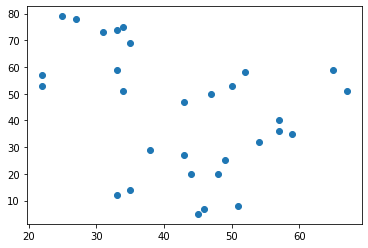

In [20]:
plt.scatter(df['x'],df['y'])

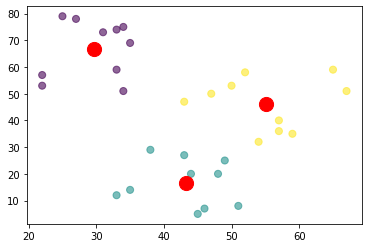

In [23]:
plt.scatter(df['x'],df['y'],c=kmeans.labels_,s=50,alpha=0.6)
#調整大小和透明度

plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200)

Text(0, 0.5, 'SSE Value')

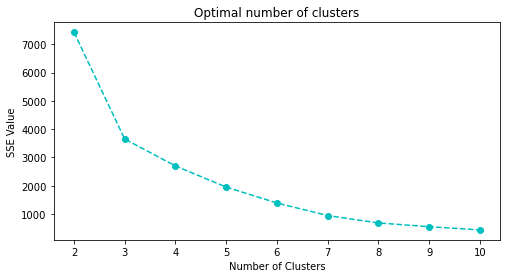

In [34]:
SSE=[]
k=range(2,11)

for x in k:
    kmean_optimized=KMeans(n_clusters=x) #找最佳的群數
    kmean_optimized.fit(df)
    SSE.append(kmean_optimized.inertia_) #SSE計算
plt.figure(figsize=(8,4))
plt.plot(k,SSE,'co--') #b可以改成其他的顏色簡稱，o顯示的要呈現的點
plt.title('Optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Value')
#找出降幅最大的轉折點，即為最佳解